# Week 5-8 - Coding Quizzes

# Week 9 Quiz

**1.Which of the following is closest to the probability of detecting a nonzero effect of ﻿X﻿ on ﻿Y﻿ (the t-value of ﻿X﻿ is greater in absolute value than about 1.96) given A = 1, B = 1, C = 10, D = 1000? Include W in the regression.**

In [3]:
import numpy as np

# Function to simulate dataset
def simulate(A=1, B=1, C=10, D=1000):
    W = np.random.normal(0, 1, D)
    X = W + np.random.normal(0, B, D)
    Y = A * X - W + np.random.normal(0, C, D)
    return Y, X, W

# Manual OLS and t-statistic of X 
def t_statistic(Y, X, W):
    D = len(Y)
    Xmat = np.column_stack([np.ones(D), X, W])        # Add constant + X + W
    beta = np.linalg.inv(Xmat.T @ Xmat) @ (Xmat.T @ Y)  # OLS coefficients

    residuals = Y - Xmat @ beta
    sigma2 = np.sum(residuals**2) / (D - Xmat.shape[1])  # Residual variance

    var_beta = sigma2 * np.linalg.inv(Xmat.T @ Xmat)     # Variance of beta
    se_beta_X = np.sqrt(var_beta[1,1])                   # Std error of X coefficient

    t_value = beta[1] / se_beta_X                        # t-stat for X
    return t_value

# Repeating simulation to estimate detection probability
def estimate_power(R=1000, A=1, B=1, C=10, D=1000):
    detections = 0
    for _ in range(R):
        Y, X, W = simulate(A, B, C, D)
        t_val = t_statistic(Y, X, W)
        if abs(t_val) > 1.96:        # Check if significant at α=0.05
            detections += 1
    return detections / R

# Run the simulation
power = estimate_power(R=500, A=1, B=1, C=10, D=1000)
print(f"Estimated probability of detecting a nonzero effect of X on Y: {power:.3f}")

Estimated probability of detecting a nonzero effect of X on Y: 0.882


**2.Which of the following is closest to the skew of the estimate in that case? (You can compute this using scipy.)** 


In [6]:
import numpy as np

# ✅ Use the EXACT function provided
def simulate(A=1, B=1, C=10, D=1000):
    W = np.random.normal(0,1,D)
    X = W + np.random.normal(0,B,D)
    Y = A*X - W + np.random.normal(0,C,D)
    return Y, X, W

# ✅ Manually run OLS: get beta for X
def estimate_beta_x(Y, X, W):
    D = len(Y)
    Xmat = np.column_stack([np.ones(D), X, W])  # constant + X + W
    beta = np.linalg.inv(Xmat.T @ Xmat) @ (Xmat.T @ Y)
    return beta[1]  # coefficient on X

# ✅ Collect many β̂ estimates
def collect_betas(R=2000):
    betas = []
    for _ in range(R):
        Y, X, W = simulate()  # use your function
        betas.append(estimate_beta_x(Y, X, W))
    return np.array(betas)

# ✅ Skewness formulas
def sample_skew(x):
    m = np.mean(x)
    s = np.std(x, ddof=0)
    return np.mean(((x - m) / s) ** 3)

def fisher_pearson_skew(x):
    n = len(x)
    g1 = sample_skew(x)
    return np.sqrt(n*(n-1)) / (n-2) * g1

# ✅ Run the experiment
betas = collect_betas(R=5000)
print("Mean of β̂:", np.mean(betas))
print("Plain sample skew:", sample_skew(betas))
print("Fisher–Pearson unbiased skew:", fisher_pearson_skew(betas))

Mean of β̂: 1.0028316143203784
Plain sample skew: -0.0036832033463279233
Fisher–Pearson unbiased skew: -0.0036843087310678593


**3. With A = 1, C = 10, D = 1,000, what value of B is needed to detect that the Data Generating Process (DGP) has a nonzero coefficient for X about 50% of the time? (Choose the closest value.)**

In [7]:
import numpy as np

def simulate(A=1, B=1, C=10, D=1000):
    W = np.random.normal(0,1,D)
    X = W + np.random.normal(0,B,D)
    Y = A*X - W + np.random.normal(0,C,D)
    return Y, X, W

def t_value(Y, X, W):
    D = len(Y)
    Xmat = np.column_stack([np.ones(D), X, W])
    beta = np.linalg.inv(Xmat.T @ Xmat) @ (Xmat.T @ Y)
    residuals = Y - Xmat @ beta
    sigma2 = np.sum(residuals**2) / (D - 3)
    var_beta = sigma2 * np.linalg.inv(Xmat.T @ Xmat)
    se = np.sqrt(var_beta[1,1])
    return beta[1] / se

def power_for_B(B, R=500):
    count = 0
    for _ in range(R):
        Y, X, W = simulate(A=1, B=B, C=10, D=1000)
        if abs(t_value(Y, X, W)) > 1.96:
            count += 1
    return count / R

Bs = [0.2, 0.6, 1.8, 5.4]
for B in Bs:
    print(f"B={B}:  detection rate ≈ {power_for_B(B):.3f}")

B=0.2:  detection rate ≈ 0.094
B=0.6:  detection rate ≈ 0.460
B=1.8:  detection rate ≈ 1.000
B=5.4:  detection rate ≈ 1.000


**4. With B = 1, C = 10, D = 100 (note the different value of D), what value of A is needed to detect that the DGP has a nonzero coefficient for X about 50% of the time? (Choose the closest value.)**

In [8]:
import numpy as np

def simulate(A=1, B=1, C=10, D=100):
    W = np.random.normal(0,1,D)
    X = W + np.random.normal(0,B,D)
    Y = A*X - W + np.random.normal(0,C,D)
    return Y, X, W

def t_value(Y, X, W):
    D = len(Y)
    Xmat = np.column_stack([np.ones(D), X, W])
    beta = np.linalg.inv(Xmat.T @ Xmat) @ (Xmat.T @ Y)

    residuals = Y - Xmat @ beta
    sigma2 = np.sum(residuals**2)/(D - 3)

    var_beta = sigma2 * np.linalg.inv(Xmat.T @ Xmat)
    se_betaX = np.sqrt(var_beta[1,1])
    return beta[1] / se_betaX

def detect_rate(A, R=500):
    count = 0
    for _ in range(R):
        Y, X, W = simulate(A=A, B=1, C=10, D=100)
        if abs(t_value(Y, X, W)) > 1.96:
            count += 1
    return count / R

for A in [0.5, 1.0, 2.0, 4.0]:
    print(f"A = {A}, detection ≈ {detect_rate(A):.3f}")

A = 0.5, detection ≈ 0.082
A = 1.0, detection ≈ 0.150
A = 2.0, detection ≈ 0.490
A = 4.0, detection ≈ 0.976


# Week 10 Quiz

**1.Use the data in homework_10.1.csv and find the fixed effect (the constant term in the regression) for each time (0 through 11). Which of these describes the pattern:**

   Unnamed: 0  city  time         X          y
0           0     0     0  0.144044   7.552716
1           1     0     1  1.454274  10.077829
2           2     0     2  0.761038  12.372731
3           3     0     3  0.121675  11.489263
4           4     0     4  0.443863  13.104833

Fixed effects (intercepts) by time:
    time  intercept
0      0   2.750022
1      1   4.735805
2      2   6.129108
3      3   7.152190
4      4   8.073823
5      5   9.047837
6      6   8.507869
7      7   8.412893
8      8   8.065531
9      9   7.492720
10    10   6.079775
11    11   4.762796

Pattern heuristic: increase-then-decrease


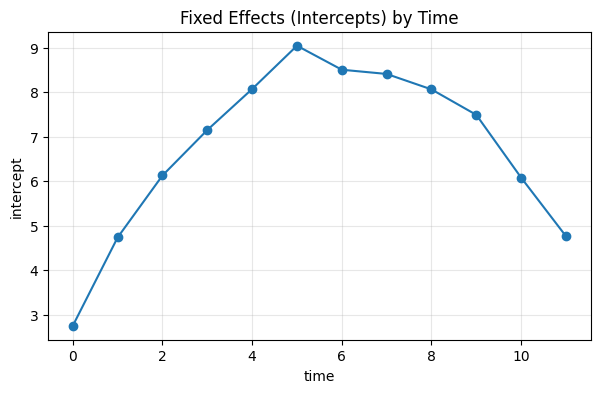

In [ ]:
import pandas as pd
import numpy as np

# ---------- 1) Load data ----------
URL = "https://raw.githubusercontent.com/joshua-vonkorff/DX702-mod-6/refs/heads/main/homework_10.1.csv"
df = pd.read_csv(URL)

# Expect columns like: 'time', 'X', 'y'
print(df.head())

# ---------- 2) Helper: OLS with or without statsmodels ----------
try:
    import statsmodels.api as sm
    HAVE_SM = True
except Exception:
    HAVE_SM = False

def fit_intercept(y, x):
    """
    Return the intercept from y ~ 1 + x.
    Uses statsmodels if available, otherwise NumPy closed form.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    n = len(y)

    if HAVE_SM:
        X = sm.add_constant(x)
        beta = sm.OLS(y, X).fit().params
        return float(beta[0])

    # NumPy manual OLS: intercept = mean(y) - slope*mean(x)
    x_mean, y_mean = x.mean(), y.mean()
    slope = np.cov(x, y, bias=True)[0,1] / np.var(x, ddof=0)
    intercept = y_mean - slope * x_mean
    return float(intercept)

# ---------- 3) Compute fixed effect (intercept) for each time ----------
intercepts = []
for t in sorted(df["time"].unique()):
    dft = df[df["time"] == t]
    alpha_t = fit_intercept(dft["y"], dft["X"])   # y ~ 1 + X
    intercepts.append({"time": int(t), "intercept": alpha_t})

effects = pd.DataFrame(intercepts).sort_values("time").reset_index(drop=True)
print("\nFixed effects (intercepts) by time:")
print(effects)

# ---------- 4) (Optional) Quick interpretation ----------
# Detect “rise then fall” vs “fall then rise” vs monotone vs random-ish
vals = effects["intercept"].values
peak_idx = vals.argmax()
trough_idx = vals.argmin()

if peak_idx > 0 and peak_idx < len(vals)-1:
    trend = "increase-then-decrease"
elif trough_idx > 0 and trough_idx < len(vals)-1:
    trend = "decrease-then-increase"
elif np.all(np.diff(vals) >= 0):
    trend = "monotone-increase"
elif np.all(np.diff(vals) <= 0):
    trend = "monotone-decrease"
else:
    trend = "mixed"

print(f"\nPattern heuristic: {trend}")

# ---------- 5) Plot ----------
try:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(7,4))
    plt.plot(effects["time"], effects["intercept"], marker="o")
    plt.title("Fixed Effects (Intercepts) by Time")
    plt.xlabel("time")
    plt.ylabel("intercept")
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print("\n(Matplotlib unavailable; skipping plot)", e)

**2.What about the fixed effect for each city (0 through 9).**

In [11]:
import pandas as pd
import numpy as np

# Load data from GitHub
url = "https://raw.githubusercontent.com/joshua-vonkorff/DX702-mod-6/refs/heads/main/homework_10.1.csv"
df = pd.read_csv(url)

city_effects = []

# Loop through cities 0–9 and compute OLS intercept manually
for c in sorted(df['city'].unique()):
    df_city = df[df['city'] == c]

    X = df_city['X'].values
    y = df_city['y'].values

    # Manual OLS: β = Cov(X,y)/Var(X)
    beta = np.cov(X, y, bias=True)[0,1] / np.var(X)
    intercept = np.mean(y) - beta * np.mean(X)

    city_effects.append(intercept)

# Display results
for c, a in enumerate(city_effects):
    print(f"City {c}: intercept ≈ {a:.3f}")

City 0: intercept ≈ 11.018
City 1: intercept ≈ 5.206
City 2: intercept ≈ 7.922
City 3: intercept ≈ 12.935
City 4: intercept ≈ 10.837
City 5: intercept ≈ -0.079
City 6: intercept ≈ 7.692
City 7: intercept ≈ 3.278
City 8: intercept ≈ 3.384
City 9: intercept ≈ 5.463


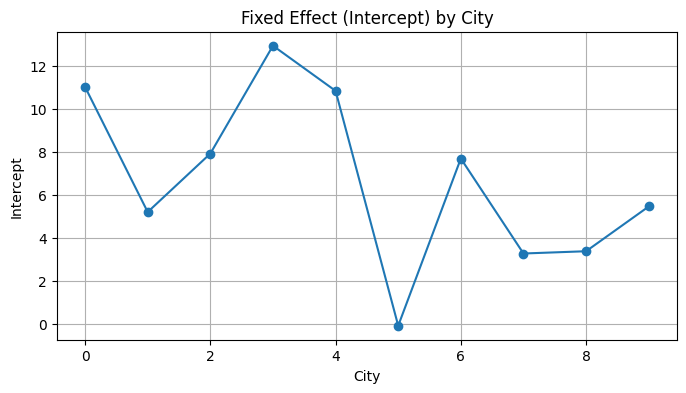

In [12]:
# Compute intercepts manually for each city
city_effects = []
cities = sorted(df['city'].unique())

for c in cities:
    df_city = df[df['city'] == c]
    X = df_city['X'].values
    y = df_city['y'].values

    # Manual OLS: beta = Cov(X,y)/Var(X), intercept = mean(y) - beta*mean(X)
    beta = np.cov(X, y, bias=True)[0, 1] / np.var(X)
    intercept = np.mean(y) - beta * np.mean(X)
    city_effects.append(intercept)

# Plot the intercepts
plt.figure(figsize=(8, 4))
plt.plot(cities, city_effects, marker='o')
plt.title("Fixed Effect (Intercept) by City")
plt.xlabel("City")
plt.ylabel("Intercept")
plt.grid(True)
plt.show()

**3. For the following data, model np.exp(Y) as a function of X and Z.** 



num = 10000 

 

X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)

Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)

Y = np.log(X + Z) + np.random.normal(0, 1, (num,)) 



With enough data, the coefficients of X and Z are closest to: 

In [14]:
import numpy as np

# Step 1: Generate data
num = 100000  # large sample for accuracy
X = np.clip(np.random.normal(3, 1, num), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, num), 0.01, 100)
epsilon = np.random.normal(0, 1, num)

# Y = log(X + Z) + error
Y = np.log(X + Z) + epsilon
expY = np.exp(Y)

# Step 2: Run manual OLS for exp(Y) ~ X + Z
X_matrix = np.column_stack([np.ones(num), X, Z])  # Add intercept
beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ expY)

print("Estimated coefficients:")
print(f"Intercept ≈ {beta_hat[0]:.4f}")
print(f"Coefficient on X ≈ {beta_hat[1]:.4f}")
print(f"Coefficient on Z ≈ {beta_hat[2]:.4f}")

# Step 3: Show theoretical value
print("\nTheoretical coefficient (E[e^ε] = e^(σ²/2)) =", np.exp(0.5))

Estimated coefficients:
Intercept ≈ 0.3326
Coefficient on X ≈ 1.5791
Coefficient on Z ≈ 1.6041

Theoretical coefficient (E[e^ε] = e^(σ²/2)) = 1.6487212707001282


**4.Which is closest to the optimal treatment effect?**

In [16]:
import numpy as np

# ----- settings -----
n   = 10_000   # sample size per dataset
R   = 100      # how many datasets
rng = np.random.default_rng(0)

def ols_beta_and_ses(y, X):
    """
    X must include an intercept column.
    Returns (beta, se_conventional, se_HC1).
    """
    n, k = X.shape
    XtX = X.T @ X
    XtX_inv = np.linalg.inv(XtX)

    beta = XtX_inv @ (X.T @ y)
    u = y - X @ beta

    # (i) Conventional (homoskedastic) SE
    s2 = (u @ u) / (n - k)
    V_conv = s2 * XtX_inv
    se_conv = np.sqrt(np.diag(V_conv))

    # White HC1 robust SE (good under heteroskedasticity)
    Xu = X * u[:, None]
    meat = Xu.T @ Xu
    V_hc1 = (n / (n - k)) * XtX_inv @ meat @ XtX_inv
    se_hc1 = np.sqrt(np.diag(V_hc1))
    return beta, se_conv, se_hc1

# storage
betaX = np.empty(R)
seX_conv = np.empty(R)
seX_hc1  = np.empty(R)

for r in range(R):
    # generate one dataset
    Z = rng.normal(0, 1, n)
    X = Z + rng.normal(0, 1, n)           # correlated with Z
    eps = rng.normal(0, np.abs(X), n)     # heteroskedastic: Var(eps|X)=X^2
    Y = 1.5*X + 2.3*Z + eps

    Xmat = np.column_stack([np.ones(n), X, Z])  # intercept, X, Z
    beta, se_conv, se_hc1 = ols_beta_and_ses(Y, Xmat)

    betaX[r]   = beta[1]       # coefficient of X
    seX_conv[r]= se_conv[1]    # (i) conventional SE for X
    seX_hc1[r] = se_hc1[1]     # robust HC1 SE for X

# (ii) Monte-Carlo SD = SD of the estimates across replications
mc_sd = betaX.std(ddof=1)

print(f"True beta_X = 1.5, n={n}, R={R}")
print(f"(i)  Mean CONVENTIONAL SE (homoskedastic): {seX_conv.mean():.4f}")
print(f"     Mean ROBUST (White HC1) SE:           {seX_hc1.mean():.4f}")
print(f"(ii) Monte-Carlo SD of beta_X:              {mc_sd:.4f}")

# quick takeaway
if mc_sd > seX_conv.mean() * 1.2:
    print("\nTakeaway: (ii) is clearly bigger than (i) → conventional SE underestimates uncertainty.")

True beta_X = 1.5, n=10000, R=100
(i)  Mean CONVENTIONAL SE (homoskedastic): 0.0141
     Mean ROBUST (White HC1) SE:           0.0199
(ii) Monte-Carlo SD of beta_X:              0.0184

Takeaway: (ii) is clearly bigger than (i) → conventional SE underestimates uncertainty.


# Week 11 Quiz

**1. Which is closest to the correlation of ﻿X﻿ with the error term in the equation for ﻿Y﻿?**

**2.If ﻿Y﻿ is written as depending on ﻿X﻿ and ﻿Z﻿ only, ﻿W﻿ is part of the error term. Which, then, is closest to the expected correlation of ﻿X﻿ with the error term in the equation for ﻿Y﻿?**


**3.In the data frame for homework_7.1.csv, control for W by regressing ﻿Y﻿ on ﻿X﻿ and ﻿Z﻿ at the following constant values of ﻿W﻿: -1, 0, and 1. (You cannot literally use a constant value of ﻿W﻿, of course, or you will have only one data point! How will you manage this?) The question is: Is the coefficient of ﻿X﻿**

# Week 12 Quiz

**Using homework_8.1.csv, find the Average treatment effect with inverse probability weighting. Then, include your code and a written explanation of your work (mentioning any choices or strategies you made in writing the code) in your homework reflection.**  